##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**ASSIGNMENT 1 - LINEAR MODELS FOR REGRESSION AND CLASSIFICATION**
--------------------------------------------------------------------------------
**Group 9**

---
Tarun Raman, Jayesh Totlani, Ananya Jain, Anamay Trivedi, Divyanshu

---
2021AAPS2308H, 2021AAPS1815H, 2021AAPS2121H 2021AAPS2217H, 2021AAPS1937H


This assignment aims to identify the differences between three sets of Machine Learning models.

# **_1. Dataset Generation_**

**Imported the included dataset 'diabetes2.csv' which has been  attached along in the submission.Synthetic Data Synthesizer code has been provided in a commented way.**

In [153]:
#%pip install sdv
#%pip install urllib3==1.26.7

#import sdv

#from sdv.datasets.local import load_csvs

# assume that my_folder contains 1 CSV file named 'guests.csv'
#datasets = load_csvs(folder_name='/content')

# the data is available under the file name
#guests_table  = datasets['diabetes2']

#from sdv.metadata import SingleTableMetadata

#metadata = SingleTableMetadata()

#metadata.detect_from_csv(filepath='/content/diabetes2.csv')

#from sdv.lite import SingleTablePreset

#synthesizer = SingleTablePreset(
#    metadata,
#    name='FAST_ML'
#)

#synthesizer.fit(
#    data=guests_table

#)

#synthetic_data = synthesizer.sample(
#    num_rows=500
#)

#synthetic_data.head()

#synthetic_data.to_csv('diabetes_new.csv')



```
# This is formatted as code
```

# ***2. Preprocess and perform exploratory data analysis of the dataset obtained***

**Importing Libraries**

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

**Data Analysis & Pre-Processing**

In [155]:
df=pd.read_csv(r"diabetes_new.csv")
df=df.drop("Unnamed: 0",axis=1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,139,75,35,159,35.448240,0.780996,37,1
1,4,79,42,43,177,28.084784,0.335059,29,1
2,1,161,79,29,202,38.425897,0.618149,35,1
3,5,147,62,22,122,26.103594,0.147669,37,0
4,1,136,83,45,169,40.988707,0.078000,21,0


In [156]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.185623,0.174361,-0.064803,-0.129844,0.060411,-0.056273,0.523230,0.176085
Glucose,0.185623,1.000000,0.196215,0.056860,0.252544,0.233849,0.112083,0.246321,0.351813
BloodPressure,0.174361,0.196215,1.000000,0.257591,0.096254,0.350713,0.029064,0.247437,0.072567
SkinThickness,-0.064803,0.056860,0.257591,1.000000,0.447154,0.378895,0.135503,-0.087813,0.050403
Insulin,-0.129844,0.252544,0.096254,0.447154,1.000000,0.261752,0.110587,-0.134450,0.102682
BMI,0.060411,0.233849,0.350713,0.378895,0.261752,1.000000,0.152005,0.010781,0.271032
DiabetesPedigreeFunction,-0.056273,0.112083,0.029064,0.135503,0.110587,0.152005,1.000000,-0.014336,0.108521
Age,0.523230,0.246321,0.247437,-0.087813,-0.134450,0.010781,-0.014336,1.000000,0.134397
Outcome,0.176085,0.351813,0.072567,0.050403,0.102682,0.271032,0.108521,0.134397,1.000000


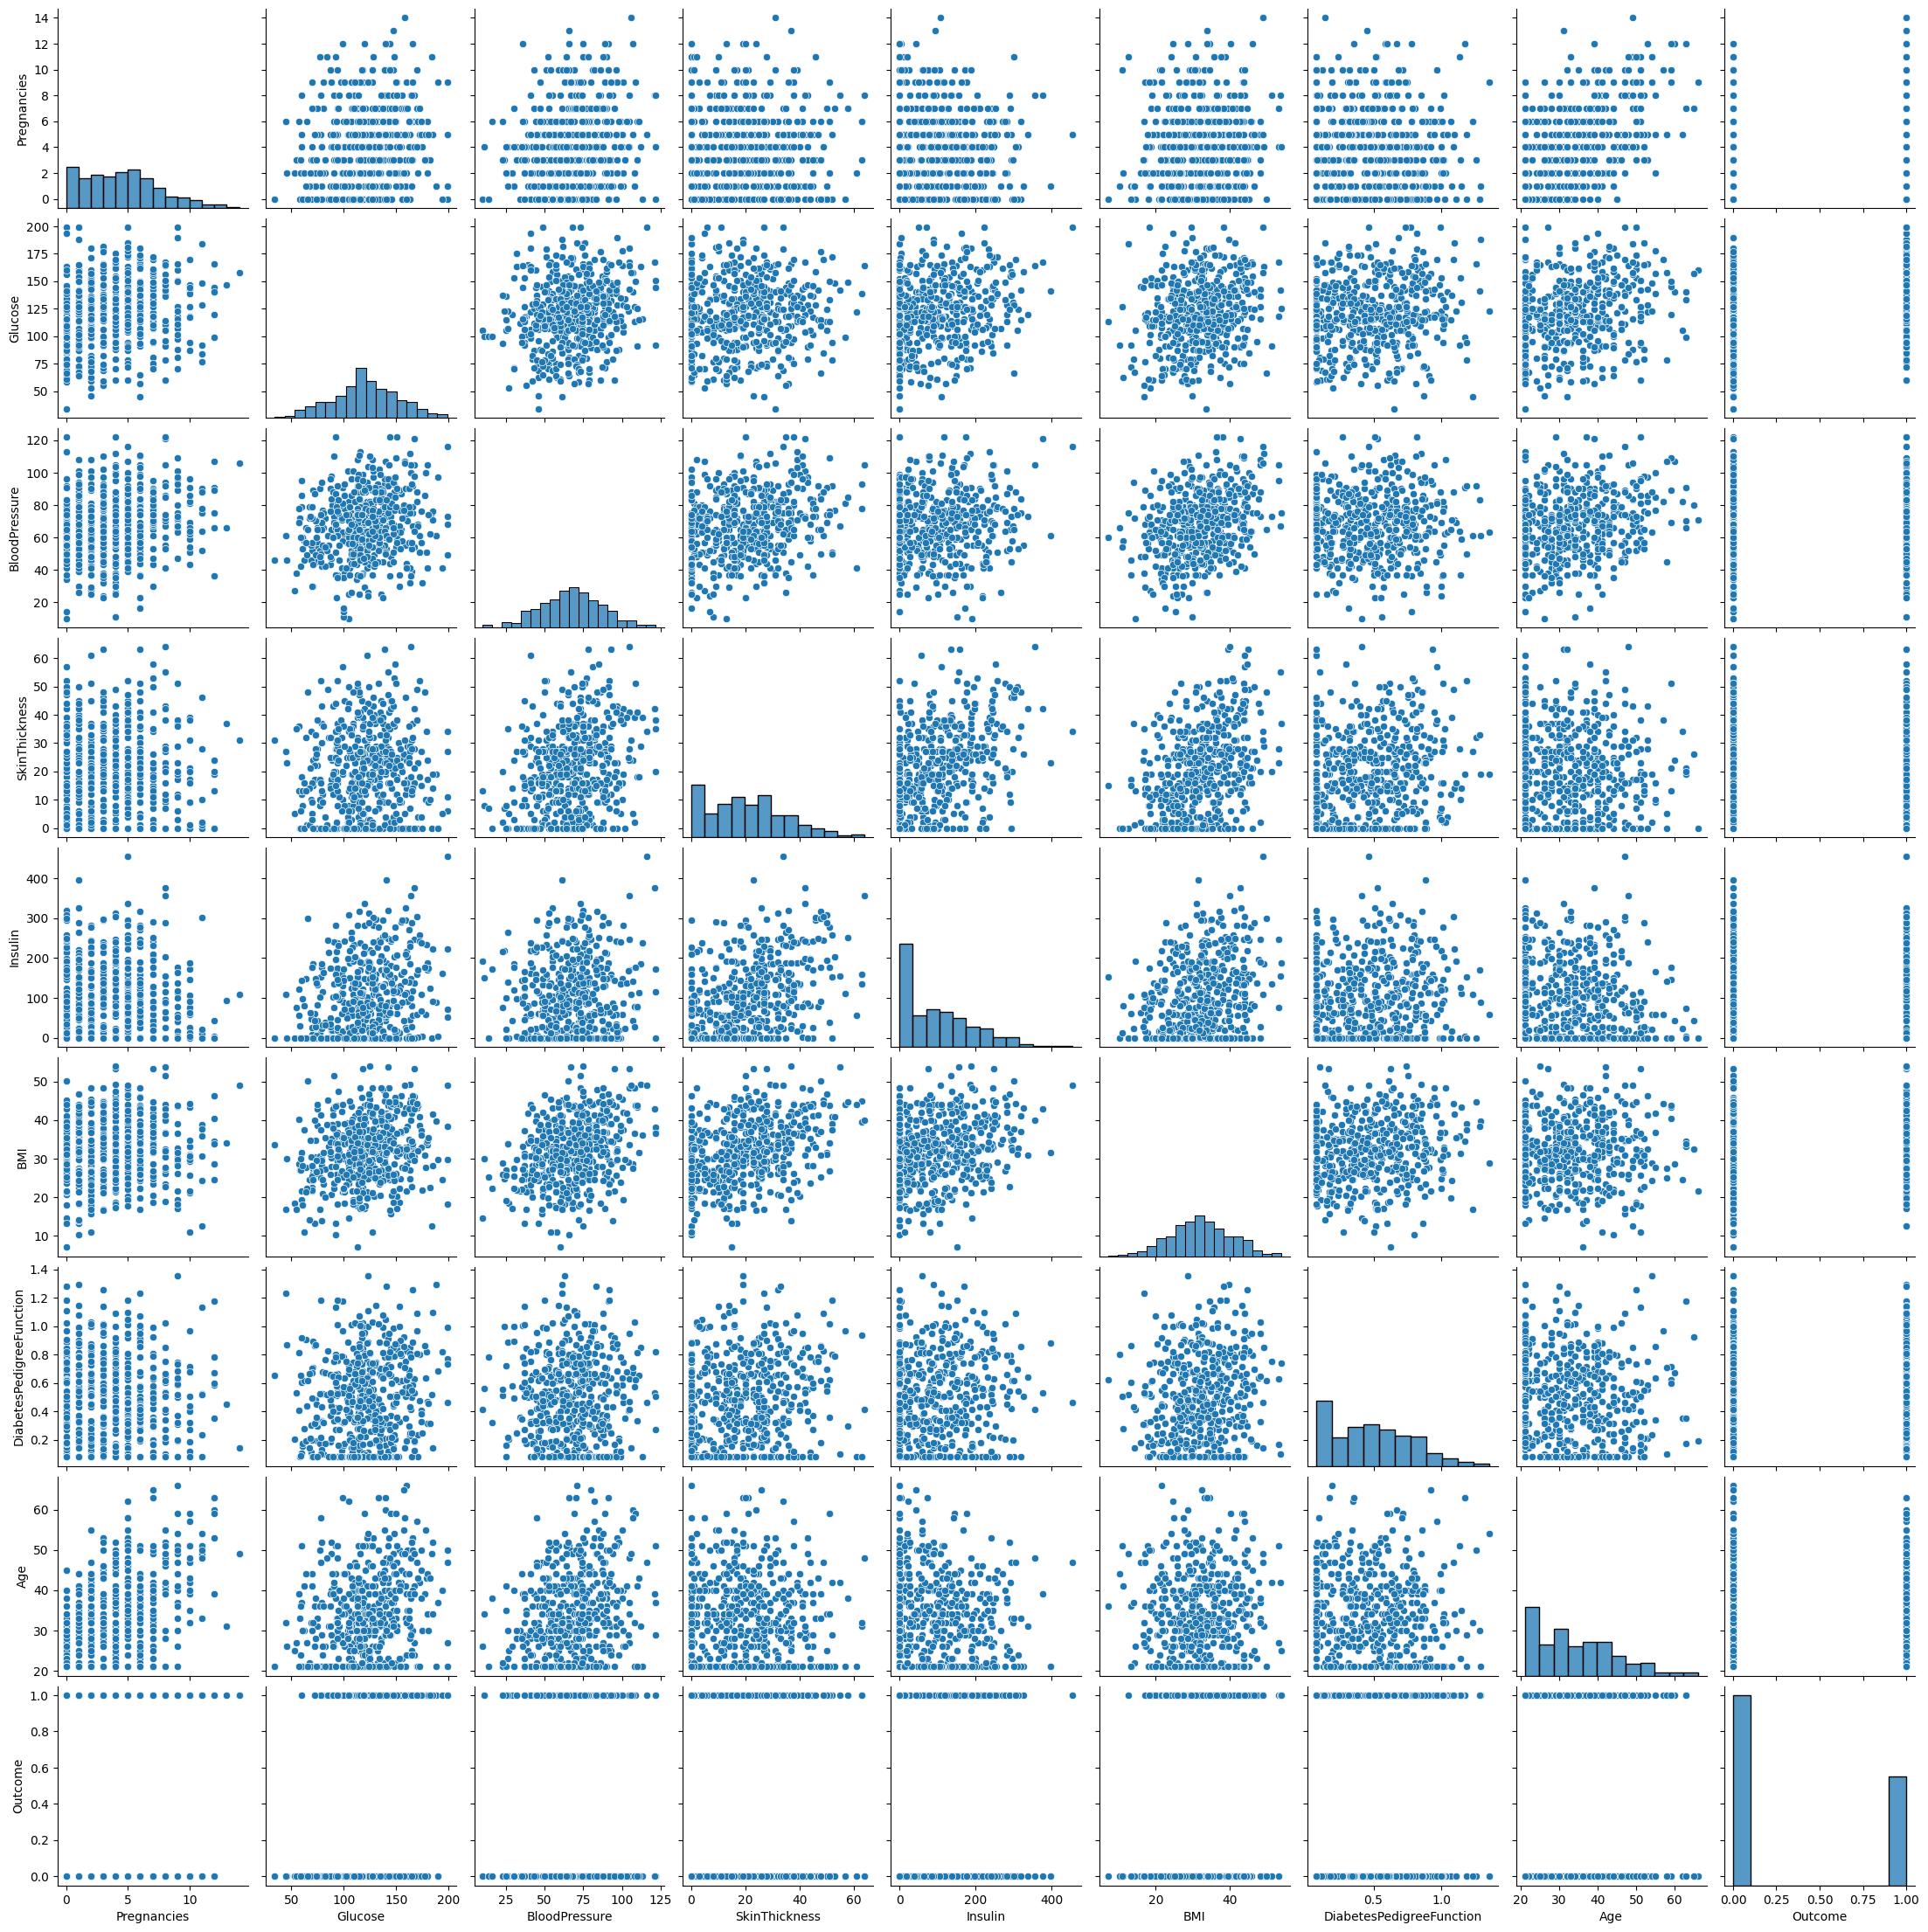

In [157]:
sns.pairplot(df)

<Axes: >

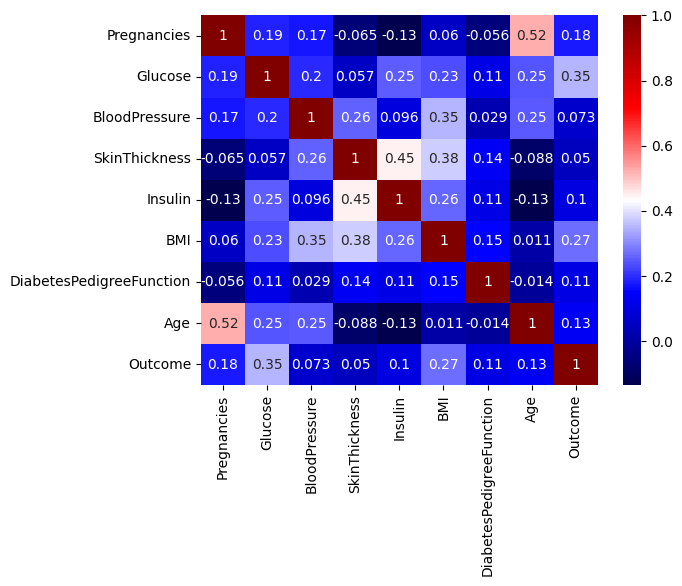

In [158]:
sns.heatmap(df.corr(), cmap="seismic",annot=True)

**The following features don't significantly impact our output parameters**


*   Blood Pressure
*   Skin Thickness




In [159]:
def minmax_scaler(df,column):
    min=np.min(df[column])
    max=np.max(df[column])
    df[column]=(df[column]-min)/(max-min)

In [160]:
minmax_scaler(df,"Pregnancies")
minmax_scaler(df,"Glucose")
minmax_scaler(df,"BloodPressure")
minmax_scaler(df,"SkinThickness")
minmax_scaler(df,"Insulin")
minmax_scaler(df,"BMI")
minmax_scaler(df,"Age")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.428571,0.636364,0.580357,0.546875,0.349451,0.605284,0.780996,0.355556,1
1,0.285714,0.272727,0.285714,0.671875,0.389011,0.448510,0.335059,0.177778,1
2,0.071429,0.769697,0.616071,0.453125,0.443956,0.668681,0.618149,0.311111,1
3,0.357143,0.684848,0.464286,0.343750,0.268132,0.406329,0.147669,0.355556,0
4,0.071429,0.618182,0.651786,0.703125,0.371429,0.723246,0.078000,0.000000,0


In [161]:
# X=df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
X=df[['Pregnancies','Glucose','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y=df[['Outcome']]

In [162]:
X_train=X.iloc[:400]
y_train=y.iloc[:400]
X_test=X.iloc[400:]
y_test=y.iloc[400:]

X_train = X_train.to_numpy()
y_train = y_train.to_numpy().flatten()  # Flatten the y_train to ensure it's a 1D array
X_test = X_test.to_numpy()
y_test = y_test.to_numpy().flatten()     # Flatten the y_test to ensure it's a 1D array

# ***3. Comparison of Stochastic Gradient Descent and Batch Gradient Descent using Linear Regression***

## **_Stochastic Gradient Descent_**

In [163]:
class SGD:
    def __init__(self):
        self.w = None
        self.b = None

    def predict(self, x):
        # Predicted value
        return np.dot(x, self.w) + self.b

    def mse(self, y, y_pred):
        mse = np.sum((y - y_pred) ** 2) / np.size(y)
        return mse

    def costf(self, y, f):
        n = len(y)
        J = np.sum((y - f) ** 2) / (2 * n)
        return J

    def modify(self, f, a, x, y):
        # a is the learning rate

        # Change 1: Select a random data point
        random_idx = random.randint(0, len(x) - 1)
        x_random = x[random_idx, :]
        y_random = y[random_idx]

        # Calculate the gradient for the selected data point
        gradient_w = x_random * (f[random_idx] - y_random)
        gradient_b = f[random_idx] - y_random

        # Update w and b using the stochastic gradient
        self.w = self.w - a * gradient_w
        self.b = self.b - a * gradient_b



    def model(self, x, y, learning_rate=0.1, max_iterations=1000, threshold=0.01):
        n = x.shape[1]
        self.w = np.random.rand(n)
        self.b = random.random()
        f = self.predict(x)
        J = self.costf(y, f)
        c = 0
        J_naught = threshold
        mse_epochs=[]

        while J > J_naught and max_iterations > 0:
            J_prev = J
            self.modify(f, learning_rate, x, y)
            f = self.predict(x)
            J = self.costf(y, f)
            mse_epochs.append(self.mse(y,f))
            if J_prev < J:
                c += 1
            if c >= 5:
                learning_rate *= 0.1
                self.w = np.random.rand(n)
                self.b = random.random()
                f = self.predict(x)
                J = self.costf(y, f)
                c = 0

            if J_prev > J and J_prev - J <= learning_rate * 10 ** (-3):
                break
            max_iterations -= 1
        return mse_epochs

    def fit(self, x, y, learning_rate=0.1, max_iterations=1000, threshold=0.01):
        return self.model(x, y, learning_rate, max_iterations, threshold)

    def linreg(self, x, y):
        y_predicted = self.predict(x)
        mse_value = self.mse(y, y_predicted)
        return mse_value, self.w, self.b


In [164]:
m=SGD()
mse_epochs_SGD=m.fit(X_train,y_train)


In [165]:
error,w,b=m.linreg(X_test,y_test)


In [166]:
error

2.841988576015696

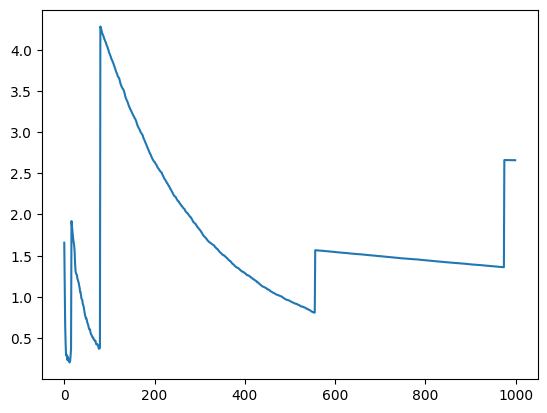

In [167]:
plt.plot(mse_epochs_SGD)

## **_Batch Gradient Descent_**

In [168]:
class BGD:
    def __init__(self):
        self.w = None
        self.b = None

    def predict(self, x):
        # Predicted value
        return np.dot(x, self.w) + self.b

    def mse(self, y, y_pred):
        mse = np.sum((y - y_pred) ** 2) / np.size(y)
        return mse

    def costf(self, y, f):
        n = len(y)
        J = np.sum((y - f) ** 2) / (2 * n)
        return J

    def modify(self, f, a, x, y):
        # Calculate the gradient using the entire dataset
        gradient_w = np.dot(x.T, (f - y)) / len(y)
        gradient_b = np.sum(f - y) / len(y)

        # Update w and b using the batch gradient
        self.w = self.w - a * gradient_w
        self.b = self.b - a * gradient_b


    def model(self, x, y, learning_rate=0.1, max_iterations=1000, threshold=0.01):
        n = x.shape[1]
        self.w = np.random.rand(n)
        self.b = random.random()
        f = self.predict(x)
        J = self.costf(y, f)
        c = 0
        mse_epochs=[]
        J_naught = threshold

        while J > J_naught and max_iterations > 0:
            J_prev = J
            self.modify(f, learning_rate, x, y)
            f = self.predict(x)
            J = self.costf(y, f)
            mse_epochs.append(self.mse(y,f))
            if J_prev < J:
                c += 1
            if c >= 5:
                learning_rate *= 0.1
                self.w = np.random.rand(n)
                self.b = random.random()
                f = self.predict(x)
                J = self.costf(y, f)
                c = 0
            if J_prev > J and J_prev - J <= learning_rate * 10 ** (-3):
                break
            max_iterations -= 1
        return mse_epochs

    def fit(self, x, y, learning_rate=0.1, max_iterations=100, threshold=0.1):
        return self.model(x, y, learning_rate, max_iterations, threshold)

    def linreg(self, x, y):
        y_predicted = self.predict(x)
        mse_value = self.mse(y, y_predicted)
        return mse_value, self.w, self.b


In [169]:
m=BGD()
mse_epochs_BGD=m.fit(X_train,y_train)


In [170]:
m.mse(y_test,m.predict(X_test))

0.2161486759430618

## **_Insights drawn (plots, markdown explanations)_**

Text(0.5, 1.0, 'Batch Gradient Descent')

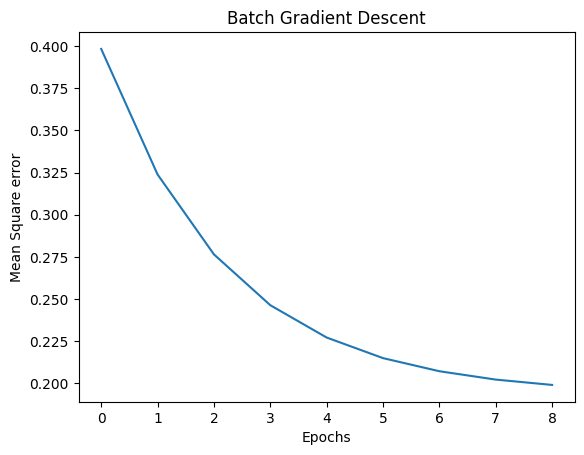

In [171]:
plt.plot(mse_epochs_BGD)
plt.xlabel('Epochs')
plt.ylabel('Mean Square error')
plt.title('Batch Gradient Descent')

Batch Gradinet Descent Performs better than Stochastic Gradient Descent because the BGD operates on whole dataset to perform parameter tuning while the SGD takes a random data sample to do the same making it more prone to noise.

# **_4. Comparison of Lasso and Ridge Regression using Polynomial Regression_**

## **_Lasso Regression_**

In [172]:
class LassoRegression:
    def __init__(self, degree,lamda=0, learning_rate=0.01, iterations=1000):
        self.degree = degree
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.theta = None
        self.lamda=lamda

    def fit(self, X, y):
        X_poly = self.polynomial_features(X)
        self.theta = self.initialize(X_poly)
        mse_epochs=[]

        m = len(X)
        for _ in range(self.iterations):
            predictions = self.predict(X)
            error = predictions - y.reshape(-1,1)
            gradient = (1/m) * X_poly.T.dot(error)
            mse_epochs.append(self.mse(y,predictions))

            regularization_term = self.l1_regularization()
            gradient += regularization_term


            self.theta -= self.learning_rate * gradient
        return mse_epochs

    def polynomial_features(self, X):
        X_poly = np.c_[X]

        for i in range(2, self.degree + 1):
            X_poly = np.c_[X_poly, X**i]

        X_poly = np.c_[np.ones((X_poly.shape[0], 1)), X_poly]

        return X_poly

    def initialize(self,X):
        return np.random.rand(X.shape[1], 1)

    def predict(self, X):
        X_poly = self.polynomial_features(X)
        # print(X_poly.shape)
        # print(self.theta.shape)
        return X_poly.dot(self.theta)

    def l1_regularization(self):     #Lasso
        return self.lamda * np.sign(self.theta)


    def mse(self, y, y_pred):
        mse = np.sum((y - y_pred) ** 2) / np.size(y)
        return mse

In [173]:
m = LassoRegression(degree=2, lamda=0.1)
mse_epochs_lasso=m.fit(X_train, y_train)
m.mse(y_test,m.predict(X_test))

25.94669128442396

## **_Ridge Regression_**

In [174]:
class RidgeRegression:
    def __init__(self, degree,lamda=0, learning_rate=0.01, iterations=1000):
        self.degree = degree
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.theta = None
        self.lamda=lamda

    def fit(self, X, y):
        X_poly = self.polynomial_features(X)
        self.theta = self.initialize(X_poly)
        mse_epochs=[]

        m = len(X)
        for _ in range(self.iterations):
            predictions = self.predict(X)
            error = predictions - y.reshape(-1,1)
            gradient = (1/m) * X_poly.T.dot(error)
            mse_epochs.append(self.mse(y,predictions))



            regularization_term = self.l2_regularization()
            gradient += regularization_term


            self.theta -= self.learning_rate * gradient
        return mse_epochs

    def polynomial_features(self, X):
        X_poly = np.c_[X]

        for i in range(2, self.degree + 1):
            X_poly = np.c_[X_poly, X**i]

        X_poly = np.c_[np.ones((X_poly.shape[0], 1)), X_poly]

        return X_poly

    def initialize(self,X):
        return np.random.rand(X.shape[1], 1)

    def predict(self, X):
        X_poly = self.polynomial_features(X)
        # print(X_poly.shape)
        # print(self.theta.shape)
        return X_poly.dot(self.theta)

    def l2_regularization(self):     #Ridge
        return self.lamda * 2 *self.theta

    def mse(self, y, y_pred):
        mse = np.sum((y - y_pred) ** 2) / np.size(y)
        return mse

In [175]:
m = RidgeRegression(degree=2, lamda=0.1)
mse_epochs_ridge=m.fit(X_train, y_train)
m.mse(y_test,m.predict(X_test))

24.936790456035787

## **_Insights drawn (plots, markdown explanations)_**

Lasso Regression

Text(0.5, 1.0, 'Lasso Regression')

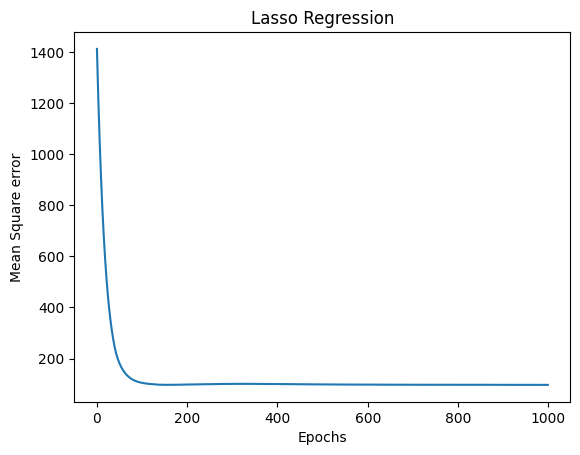

In [176]:
plt.plot(mse_epochs_lasso)
plt.xlabel('Epochs')
plt.ylabel('Mean Square error')
plt.title('Lasso Regression')

Ridge Regression

Text(0.5, 1.0, 'Ridge Regression')

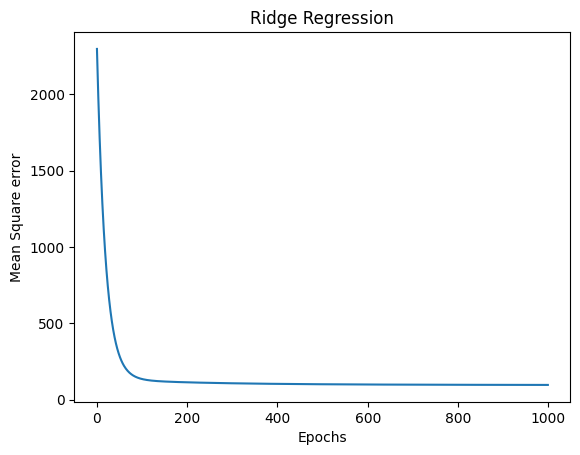

In [177]:
plt.plot(mse_epochs_ridge)
plt.xlabel('Epochs')
plt.ylabel('Mean Square error')
plt.title('Ridge Regression')

**Lasso regularisation is better at reducinng the mean square error as compared to ridge regularisation because in the former ,all the redundant feature weights are eventually set to zero ,while in the latter , the redundant weights still have an impact on the model as their weights never actually become exactly zero.**

# **_5. Comparison of Logistic Regression and Least Squares Classification_**

## **_Logistic Regression_**

In [178]:
class LogisticRegression:

    def __init__(self, learning_rate=0.015, epochs=100000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        samples, features = X.shape

        # initialize parameters
        self.weights = np.random.rand(features, 1)
        self.bias = 0
        loss=[]

        # gradient descent
        for _ in range(self.epochs):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_pred = self.sigmoid(linear_model)

            # compute gradients
            gradient_w = (1 / samples) * np.dot(X.T, (y_pred - y))
            gradient_b = (1 / samples) * np.sum(y_pred - y)
            # update parameters
            self.weights -= self.learning_rate * gradient_w
            self.bias -= self.learning_rate * gradient_b
            loss.append(self.loss(y,y_pred))

        return loss

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_pred_class = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_pred_class)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def loss(self,y,y_pred):
        return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    def f1_score(self,y_true, y_pred):
        # Calculate precision and recall
        tp=0
        fp=0
        fn=0
        for i in range(len(y_true)):
            tp += (y_true[i] == 1) & (y_pred[i] == 1)
            fp += (y_true[i] == 0) & (y_pred[i] == 1)
            fn += (y_true[i] == 1) & (y_pred[i] == 0)

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0

        # Calculate F1 score
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        return f1


In [179]:
def conf_mat(y_true, y_pred, threshold=0.5):
    y_pred_binary = (y_pred >= threshold).astype(int)

    TP = ((y_true == 1) & (y_pred_binary == 1)).sum()
    TN = ((y_true == 0) & (y_pred_binary == 0)).sum()
    FP = ((y_true == 0) & (y_pred_binary == 1)).sum()
    FN = ((y_true == 1) & (y_pred_binary == 0)).sum()

    return TP, TN, FP, FN

def cm_plot(y_test,y_pred):
    # Calculate TP, TN, FP, FN
    TP, TN, FP, FN = conf_mat(y_test, y_pred)
    confusion_matrix = np.array([[TN, FP], [FN, TP]])
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [180]:
m=LogisticRegression()
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
loss=m.fit(X_train,y_train)
m.f1_score(y_test,m.predict(X_test))


array([0.50704225])

Text(0.5, 1.0, 'Logistic Regression')

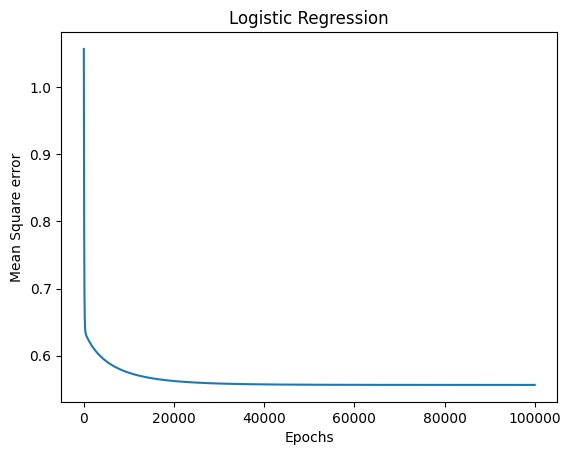

In [181]:
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Mean Square error')
plt.title('Logistic Regression')

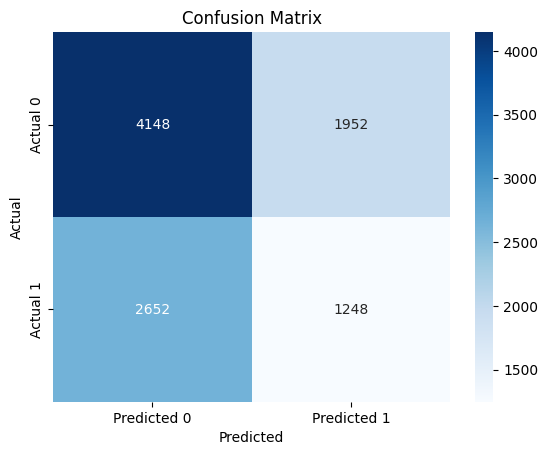

In [182]:
y_pred=m.predict(X_test)
cm_plot(y_test,y_pred)

## **_Least Squares Classification_**

In [183]:
class LeastSquaresClassifier:
    def __init__(self):
        self.theta = None

    def fit(self, X, y):
        # Add a column of ones for the bias term
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # Compute the least squares solution
        self.theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)


    def predict(self, X):
        # Add a column of ones for the bias term
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # Make predictions
        y_predict = X_b.dot(self.theta)

        # Convert predictions to binary (0 or 1)
        return (y_predict > 0.5).astype(int)

    def error(self,X,y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return np.mean((y - X_b @ self.theta) ** 2)

    def f1_score(self,y_true, y_pred):
        # Calculate precision and recall
        tp=0
        fp=0
        fn=0
        for i in range(len(y_true)):
            tp += (y_true[i] == 1) & (y_pred[i] == 1)
            fp += (y_true[i] == 0) & (y_pred[i] == 1)
            fn += (y_true[i] == 1) & (y_pred[i] == 0)

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0

        # Calculate F1 score
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        return f1

    def plot_decision_boundary(self, X, y):
        plt.scatter(X[:, 1], y, color='blue')  # Assuming X is a 2D array and you want to use the second column
        plt.xlabel("X")
        plt.ylabel("y")

        # Plot the decision boundary
        x_decision = np.array([np.min(X[:, 1]), np.max(X[:, 1])])  # Assuming X is a 2D array
        y_decision = -(self.theta[0] + self.theta[1] * x_decision) / self.theta[2]
        plt.plot(x_decision, y_decision, "r-")

        plt.title("Least Squares Classification")
        plt.show()


In [184]:
m_LSC=LeastSquaresClassifier()
m_LSC.fit(X_train,y_train)
m_LSC.error(X_test,y_test)


0.19535087436507162

In [185]:
m_LSC.f1_score(y_test, m.predict(X_test))

array([0.50704225])

## **_Insights drawn (plots, markdown explanations)_**

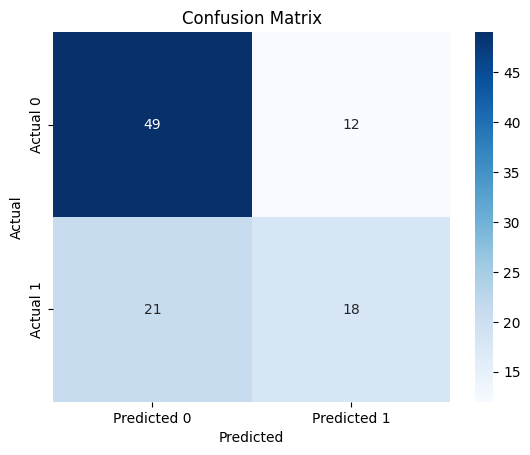

In [186]:
y_pred=m_LSC.predict(X_test)
cm_plot(y_test,y_pred)

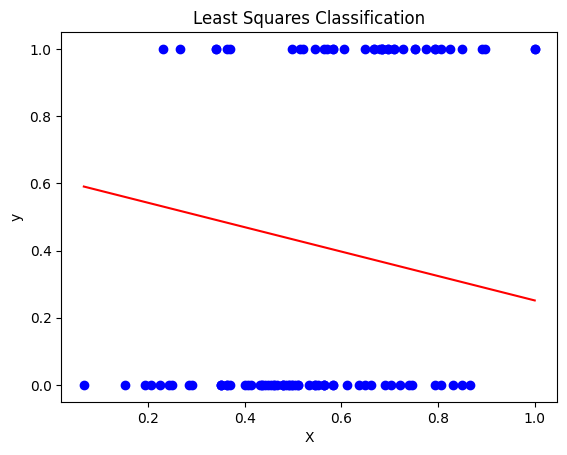

In [187]:
m_LSC.plot_decision_boundary( X_test, y_test)

**Since the decision boundary required for classification in this scenario isn't too complex, a least squares classifier tends to perform better than a logistic classifier**

# **_6. References_**

1.   https://www.kaggle.com/code/jaypradipshah/polynomial-regression-from-scratch
2.   https://www.kaggle.com/code/ninjaac/lasso-and-ridge-regression-from-scratch
3.   https://marcossilva.github.io/en/index.html
4.   https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a
5.   https://towardsdatascience.com/derivation-of-least-squares-regressor-and-classifier-708be1358fe9
6.   **Book - Christopher Bishop: Pattern Recognition and Machine Learning, Springer International Edition**

